In [13]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_brokers"
]

In [14]:
sys.path += paths


In [15]:
# !pip install elasticsearch-dsl

In [16]:
# !pip install psycopg2-binary

In [17]:

from pandas.io import sql as psql

In [18]:
from lib.connected_db import PgsqlExecutor

In [19]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [20]:
db = PgsqlExecutor(research_db)


In [21]:
sql = """

select * from model.dcf_values where is_active = 1 and total_years = 5 order by symbol, fiscal_year, created desc 
"""
data = db.get_dataframe(sql)
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0  389736      A           NYSE        2587460          1          17.96   
1  413756      A           NYSE        2587460          1          29.24   
2  342455      A           NYSE        2587460          1          24.10   
3  342060      A           NYSE        2587460          1          24.10   
4  370872      A           NYSE        2587460          1          33.29   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.066                -0.125      0.11   
1               0.095                0.408                 0.006      0.01   
2               0.095               -0.286                -0.562      0.03   
3               0.095               -0.651                -1.281      0.03   
4               0.095                0.694                 0.111      0.16   

   fiscal_year pricingdate  total_years  market_dcf   dcf  adjusted_dcf error  \
0         2002  2002-12-31            5        18.8  -0.8          -1.2         
1         2003  2003-12-31            5        29.1  30.5          28.8         
2         2004  2004-12-31            5        23.6   8.3          20.1         
3         2004  2004-12-31            5        23.6  26.0         120.1         
4         2005  2005-12-31            5        31.3  48.2          31.5         

                     created  
0 2020-06-21 01:26:47.597785  
1 2020-06-21 03:01:30.317913  
2 2020-06-20 22:29:19.472481  
3 2020-06-20 22:21:37.010891  
4 2020-06-21 00:14:28.617383

In [22]:
# sql = """

# select * from model.dcf_values_current where is_active = 1 and total_years = 5 order by symbol, fiscal_year, created desc 
# """
# data = db.get_dataframe(sql)
# data.head()


In [23]:
data.shape

(37470, 18)

In [24]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [25]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1) 
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)
data.loc[:, 'last_variance'] = shifted_by(data['variance'], 1) 
data.loc[:, 'last_adjust_growth'] = shifted_by(data['adjusted_growth_rate'], 1) 
data.loc[:, 'last_adjusted_dcf'] = shifted_by(data['adjusted_dcf'], 1)




In [26]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0  389736      A           NYSE        2587460          1          17.96   
1  413756      A           NYSE        2587460          1          29.24   
2  342455      A           NYSE        2587460          1          24.10   
3  342060      A           NYSE        2587460          1          24.10   
4  370872      A           NYSE        2587460          1          33.29   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.066                -0.125      0.11   
1               0.095                0.408                 0.006      0.01   
2               0.095               -0.286                -0.562      0.03   
3               0.095               -0.651                -1.281      0.03   
4               0.095                0.694                 0.111      0.16   

   ...                    created last_symbol  last_price  last_growth_rate  \
0  ... 2020-06-21 01:26:47.597785         NaN         NaN               NaN   
1  ... 2020-06-21 03:01:30.317913           A       17.96            -0.066   
2  ... 2020-06-20 22:29:19.472481           A       29.24             0.408   
3  ... 2020-06-20 22:21:37.010891           A       24.10            -0.286   
4  ... 2020-06-21 00:14:28.617383           A       24.10            -0.651   

   last_fiscal_year  last_market_dcf last_dcf last_variance  \
0               NaN              NaN      NaN           NaN   
1            2002.0             18.8     -0.8          0.11   
2            2003.0             29.1     30.5          0.01   
3            2004.0             23.6      8.3          0.03   
4            2004.0             23.6     26.0          0.03   

  last_adjust_growth  last_adjusted_dcf  
0                NaN                NaN  
1             -0.125               -1.2  
2              0.006               28.8  
3             -0.562               20.1  
4             -1.281              120.1  

[5 rows x 27 columns]

In [27]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1

def convert_consistent(value):
    if value > 0.65:
        return 1
    return -1

data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["adjusted_dcf_to_price"] = (data["last_adjusted_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["is_consistent"] = data["last_variance"].apply(convert_consistent)




In [28]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0  389736      A           NYSE        2587460          1          17.96   
1  413756      A           NYSE        2587460          1          29.24   
2  342455      A           NYSE        2587460          1          24.10   
3  342060      A           NYSE        2587460          1          24.10   
4  370872      A           NYSE        2587460          1          33.29   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.066                -0.125      0.11   
1               0.095                0.408                 0.006      0.01   
2               0.095               -0.286                -0.562      0.03   
3               0.095               -0.651                -1.281      0.03   
4               0.095                0.694                 0.111      0.16   

   ...  direction correct  fiscal_change  growth_changes  market_dcf_change  \
0  ...         -1   False            NaN             NaN                NaN   
1  ...          1    True            1.0           0.474          57.349666   
2  ...         -1    True            1.0          -0.694         -18.809850   
3  ...         -1    True            0.0          -0.365           0.000000   
4  ...          1    True            1.0           1.345          31.950207   

   dcf_change dcf_to_price market_dcf_to_price adjusted_dcf_to_price  \
0         NaN          NaN                 NaN                   NaN   
1  174.276169  -104.454343            4.677060           -106.681514   
2  -75.923393     4.309166           -0.478796             -1.504788   
3   73.443983   -65.560166           -2.074689            -16.597510   
4   92.116183     7.883817           -2.074689            398.340249   

   is_consistent  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  

[5 rows x 38 columns]

In [29]:
data = data.iloc[1:, :]
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
1  413756      A           NYSE        2587460          1          29.24   
2  342455      A           NYSE        2587460          1          24.10   
3  342060      A           NYSE        2587460          1          24.10   
4  370872      A           NYSE        2587460          1          33.29   
5  400244      A           NYSE        2587460          1          34.85   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
1               0.095                0.408                 0.006      0.01   
2               0.095               -0.286                -0.562      0.03   
3               0.095               -0.651                -1.281      0.03   
4               0.095                0.694                 0.111      0.16   
5               0.095                0.132                 0.000      0.00   

   ...  direction correct  fiscal_change  growth_changes  market_dcf_change  \
1  ...          1    True            1.0           0.474          57.349666   
2  ...         -1    True            1.0          -0.694         -18.809850   
3  ...         -1    True            0.0          -0.365           0.000000   
4  ...          1    True            1.0           1.345          31.950207   
5  ...          1    True            1.0          -0.562          19.224992   

   dcf_change dcf_to_price market_dcf_to_price adjusted_dcf_to_price  \
1  174.276169  -104.454343            4.677060           -106.681514   
2  -75.923393     4.309166           -0.478796             -1.504788   
3   73.443983   -65.560166           -2.074689            -16.597510   
4   92.116183     7.883817           -2.074689            398.340249   
5  -29.738660    44.788225           -5.977771             -5.376990   

   is_consistent  
1             -1  
2             -1  
3             -1  
4             -1  
5             -1  

[5 rows x 38 columns]

In [30]:
data.shape

(37469, 38)

In [31]:
import copy

In [32]:
new_data = copy.deepcopy(data[(data["correct"])&(data["fiscal_change"] == 1) 
                              &(data["is_active"] == 1)
                              &(data["total_years"] == 5)]
                             )

In [123]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]

new_data.shape

(30451, 39)

In [124]:
new_data = new_data.dropna()
new_data.shape

(30451, 39)

In [125]:
## increase the value of growth rate to 100
new_data['last_growth_rate'] = new_data['last_growth_rate'] * 100
new_data['last_adjust_growth'] = new_data['last_adjust_growth'] * 100
new_data['last_variance'] = new_data['last_variance'] * 100




In [126]:
new_data[['last_growth_rate', 'last_adjust_growth', 'last_variance']].head()

last_growth_rate  last_adjust_growth  last_variance
1            -660.0             -1250.0         1100.0
2            4080.0                60.0          100.0
4           -6510.0            -12810.0          300.0
5            6940.0              1110.0         1600.0
6            1320.0                 0.0            0.0

In [127]:
new_data["last_variance"].describe()

count    30451.000000
mean      2093.146366
std       2008.466968
min          0.000000
25%        300.000000
50%       1400.000000
75%       3500.000000
max       7000.000000
Name: last_variance, dtype: float64

(array([5069., 2600., 1866.,  812., 1482., 1318., 1222.,  525.,  941.,
         966.,  888.,  406.,  773.,  733.,  712.,  344.,  665.,  595.,
         580.,  303.,  528.,  514.,  515.,  214.,  460.,  479.,  451.,
         225.,  456.,  446.,  446.,  205.,  388.,  408.,  417.,  187.,
         380.,  392.,  303.,  237.]),
 array([   0.,  175.,  350.,  525.,  700.,  875., 1050., 1225., 1400.,
        1575., 1750., 1925., 2100., 2275., 2450., 2625., 2800., 2975.,
        3150., 3325., 3500., 3675., 3850., 4025., 4200., 4375., 4550.,
        4725., 4900., 5075., 5250., 5425., 5600., 5775., 5950., 6125.,
        6300., 6475., 6650., 6825., 7000.]),
 <a list of 40 Patch objects>)

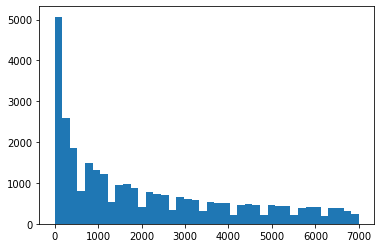

In [128]:
import matplotlib.pyplot as plt

plt.hist(new_data["last_variance"].values, bins=40)

In [129]:
new_data[new_data["price_change_perf"] > 30]["last_variance"].describe()

count    7935.000000
mean     2119.508507
std      2006.928385
min         0.000000
25%       400.000000
50%      1500.000000
75%      3500.000000
max      7000.000000
Name: last_variance, dtype: float64

(array([1279.,  675.,  469.,  219.,  374.,  346.,  300.,  152.,  256.,
         248.,  243.,  113.,  196.,  195.,  168.,   84.,  176.,  170.,
         150.,   84.,  154.,  163.,  138.,   54.,  115.,  117.,  126.,
          58.,  123.,  126.,  122.,   50.,   90.,  104.,  111.,   26.,
          96.,  107.,   89.,   69.]),
 array([   0.,  175.,  350.,  525.,  700.,  875., 1050., 1225., 1400.,
        1575., 1750., 1925., 2100., 2275., 2450., 2625., 2800., 2975.,
        3150., 3325., 3500., 3675., 3850., 4025., 4200., 4375., 4550.,
        4725., 4900., 5075., 5250., 5425., 5600., 5775., 5950., 6125.,
        6300., 6475., 6650., 6825., 7000.]),
 <a list of 40 Patch objects>)

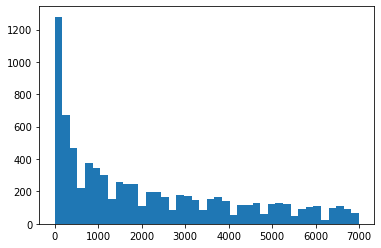

In [130]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] > 30]["last_variance"].values, bins=40)

(array([786., 330., 283., 112., 237., 205., 193.,  68., 140., 142., 141.,
         61., 124., 130., 127.,  66.,  97.,  89., 100.,  40.,  80.,  78.,
         73.,  36.,  83.,  78.,  70.,  36.,  66.,  62.,  78.,  37.,  75.,
         64.,  62.,  33.,  60.,  59.,  46.,  45.]),
 array([   0.,  175.,  350.,  525.,  700.,  875., 1050., 1225., 1400.,
        1575., 1750., 1925., 2100., 2275., 2450., 2625., 2800., 2975.,
        3150., 3325., 3500., 3675., 3850., 4025., 4200., 4375., 4550.,
        4725., 4900., 5075., 5250., 5425., 5600., 5775., 5950., 6125.,
        6300., 6475., 6650., 6825., 7000.]),
 <a list of 40 Patch objects>)

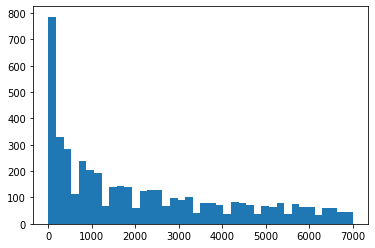

In [131]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] < -30]["last_variance"].values, bins=40)

In [132]:
## Adjust growth rate
new_data["last_adjust_growth"].describe()

count     30451.000000
mean      -1684.607730
std        5960.054468
min     -759970.000000
25%       -2710.000000
50%          20.000000
75%         350.000000
max       13800.000000
Name: last_adjust_growth, dtype: float64

(array([  26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   25.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1687.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1099.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  752.]),
 array([-20. , -19.2, -18.4, -17.6, -16.8, -16. , -15.2, -14.4, -13.6,
        -12.8, -12. , -11.2, -10.4,  -9.6,  -8.8,  -8. ,  -7.2,  -6.4,
         -5.6,  -4.8,  -4. ,  -3.2,  -2.4,  -1.6,  -0.8,   0. ,   0.8,
          1.6,   2.4,   3.2,   4. ,   4.8,   5.6,   6.4,   7.2,   8. ,
          8.8,   9.6,  10.4,  11.2,  12. ,  12.8,  13.6,  14.4,  15.2,
         16. ,  16.8,  17.6,  18.4,  19.2,  20. ]),
 <a list of 50 Patch objects>)

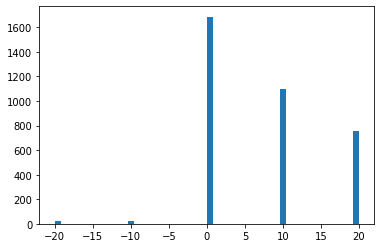

In [133]:
import matplotlib.pyplot as plt

plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
]["last_adjust_growth"].values, bins=50)

(array([   8.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   16.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1003.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  684.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  421.]),
 array([-20. , -19.2, -18.4, -17.6, -16.8, -16. , -15.2, -14.4, -13.6,
        -12.8, -12. , -11.2, -10.4,  -9.6,  -8.8,  -8. ,  -7.2,  -6.4,
         -5.6,  -4.8,  -4. ,  -3.2,  -2.4,  -1.6,  -0.8,   0. ,   0.8,
          1.6,   2.4,   3.2,   4. ,   4.8,   5.6,   6.4,   7.2,   8. ,
          8.8,   9.6,  10.4,  11.2,  12. ,  12.8,  13.6,  14.4,  15.2,
         16. ,  16.8,  17.6,  18.4,  19.2,  20. ]),
 <a list of 50 Patch objects>)

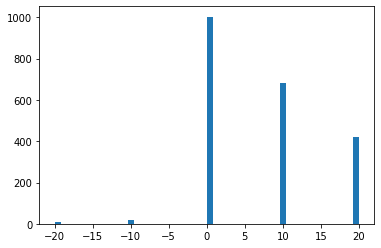

In [134]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == 1)
]["last_adjust_growth"].values, bins=50)

(array([ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 684.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 415.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 331.]),
 array([-20. , -19.2, -18.4, -17.6, -16.8, -16. , -15.2, -14.4, -13.6,
        -12.8, -12. , -11.2, -10.4,  -9.6,  -8.8,  -8. ,  -7.2,  -6.4,
         -5.6,  -4.8,  -4. ,  -3.2,  -2.4,  -1.6,  -0.8,   0. ,   0.8,
          1.6,   2.4,   3.2,   4. ,   4.8,   5.6,   6.4,   7.2,   8. ,
          8.8,   9.6,  10.4,  11.2,  12. ,  12.8,  13.6,  14.4,  15.2,
         16. ,  16.8,  17.6,  18.4,  19.2,  20. ]),
 <a list of 50 Patch objects>)

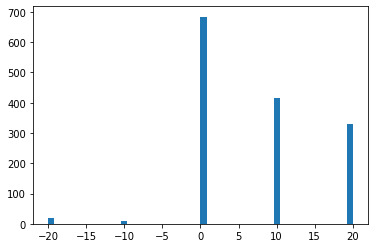

In [135]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == -1)
]["last_adjust_growth"].values, bins=50)

In [136]:
import numpy as np
import pandas as pd

In [137]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [160]:


features = [ "market_dcf_to_price",
"dcf_to_price",
"last_market_dcf",
"last_dcf",
"last_growth_rate",
"adjusted_dcf_to_price"
           ]

X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 

In [161]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [162]:
# !pip3 install sklearn

In [163]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [164]:
len(X_train), len(X_test)

(20402, 10049)

In [165]:
# !pip3 install matplotlib

(array([9.777e+03, 2.340e+02, 2.600e+01, 4.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  -99.73564356,   154.42441419,   408.58447195,   662.7445297 ,
          916.90458746,  1171.06464521,  1425.22470297,  1679.38476073,
         1933.54481848,  2187.70487624,  2441.86493399,  2696.02499175,
         2950.1850495 ,  3204.34510726,  3458.50516502,  3712.66522277,
         3966.82528053,  4220.98533828,  4475.14539604,  4729.3054538 ,
         4983.46551155,  5237.62556931,  5491.78562706,  5745.94568482,
         6000.10574257,  6254.26580033,  6508.42585809,  6762.58591584

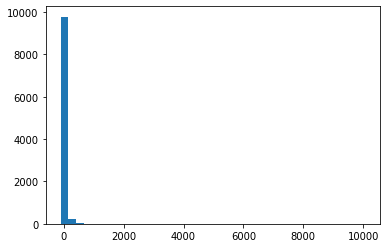

In [166]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=40)

In [167]:
filtered_outliner = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [168]:

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 12.,  19.,  31.,  40.,  57.,  78.,  89., 121., 117., 138., 180.,
        172., 237., 263., 315., 337., 430., 473., 511., 578., 613., 595.,
        590., 556., 458., 434., 364., 303., 241., 223., 173., 141., 136.,
         90.,  86.,  71.,  72.,  59.,  47.,  41.]),
 array([-9.99712986e+01, -9.49734760e+01, -8.99756533e+01, -8.49778307e+01,
        -7.99800081e+01, -7.49821855e+01, -6.99843629e+01, -6.49865403e+01,
        -5.99887177e+01, -5.49908951e+01, -4.99930725e+01, -4.49952499e+01,
        -3.99974272e+01, -3.49996046e+01, -3.00017820e+01, -2.50039594e+01,
        -2.00061368e+01, -1.50083142e+01, -1.00104916e+01, -5.01266897e+00,
        -1.48463628e-02,  4.98297625e+00,  9.98079886e+00,  1.49786215e+01,
         1.99764441e+01,  2.49742667e+01,  2.99720893e+01,  3.49699119e+01,
         3.99677345e+01,  4.49655571e+01,  4.99633797e+01,  5.49612023e+01,
         5.99590250e+01,  6.49568476e+01,  6.99546702e+01,  7.49524928e+01,
         7.99503154e+01,  8.49481380e+01, 

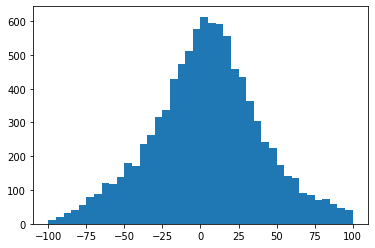

In [169]:
plt.hist(y_test, bins=40)

(array([  34.,   55.,   85.,  136.,  194.,  224.,  275.,  313.,  368.,
         420.,  501.,  588.,  709.,  793.,  928., 1073., 1276., 1414.,
        1627., 1807., 1774., 1803., 1796., 1663., 1413., 1245., 1035.,
         916.,  777.,  643.,  539.,  423.,  426.,  313.,  264.,  226.,
         226.,  179.,  141.,  137.]),
 array([-9.99763469e+01, -9.49774011e+01, -8.99784554e+01, -8.49795096e+01,
        -7.99805639e+01, -7.49816181e+01, -6.99826724e+01, -6.49837266e+01,
        -5.99847809e+01, -5.49858351e+01, -4.99868894e+01, -4.49879436e+01,
        -3.99889979e+01, -3.49900521e+01, -2.99911064e+01, -2.49921606e+01,
        -1.99932149e+01, -1.49942691e+01, -9.99532335e+00, -4.99637760e+00,
         2.56815163e-03,  5.00151390e+00,  1.00004597e+01,  1.49994054e+01,
         1.99983512e+01,  2.49972969e+01,  2.99962427e+01,  3.49951884e+01,
         3.99941342e+01,  4.49930799e+01,  4.99920257e+01,  5.49909714e+01,
         5.99899172e+01,  6.49888629e+01,  6.99878087e+01,  7.49867544

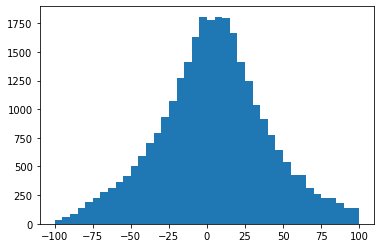

In [170]:
plt.hist(Y, bins=40)

In [171]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
y_pred = model.predict(X_test)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 1.200e+01, 1.100e+01, 1.500e+01,
        1.300e+01, 4.400e+01, 4.800e+01, 7.700e+01, 1.110e+02, 1.770e+02,
        2.510e+02, 3.400e+02, 5.350e+02, 7.860e+02, 1.381e+03, 2.049e+03,
        1.934e+03, 8.700e+02, 4.060e+02, 1.870e+02, 1.050e+02, 4.400e+01,
        3.300e+01, 2.100e+01, 7.000e+00, 8.000e+00, 2.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([-91.72773   , -87.56702   , -83.40631   , -79.2456    ,
        -75.084885  , -70.92418   , -66.763466  , -62.602753  ,
        -58.442043  , -54.28133   , -50.12062   , -45.95991   ,
        -41.7992    , -37.63849   , -33.477776  , -29.317066  ,
        -25.156355  , -20.995644  , -16.834934  , -12.674223  ,
         -8.513512  ,  -4.352801  ,  -0.19208984,   3.968621  ,
          8.129332  ,  12.290043  ,  16.450754  ,  20.611465  ,
         24.772175  ,  28.932886  ,  33.093597  ,  37.

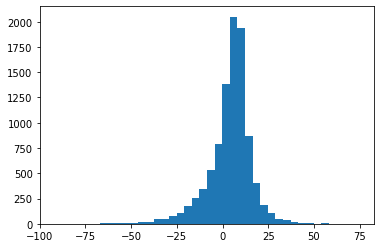

In [173]:
plt.hist(y_pred, bins=40)

In [174]:
# plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
# plt.plot(range(y_test.shape[0]), y_test, 'g-')
# plt.show()

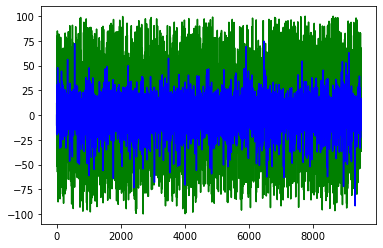

In [175]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [176]:
accuracy = accuracy_score(y_test >= 25, y_pred >= 25)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.20%


In [177]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.97%


In [178]:
accuracy = accuracy_score(y_test < -20, y_pred < -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.89%


In [179]:
accuracy = accuracy_score(y_test < -30, y_pred < -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.25%


['market_dcf_to_price', 'dcf_to_price', 'last_market_dcf', 'last_dcf', 'last_growth_rate', 'adjusted_dcf_to_price']


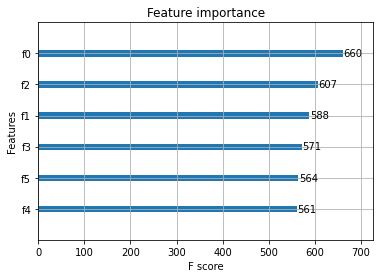

In [180]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
X = data[features].values
Y = data['direction'].values
# fit model no training data
model_2 = XGBClassifier()
model_2.fit(X, Y)
# plot feature importance
plot_importance(model_2)
print (features)
pyplot.show()

In [159]:
for index in [4,3,1,2,0, 8, 7, 5]:
    print (features[index])

market_dcf_to_price
dcf_to_price
last_market_dcf
last_dcf
last_growth_rate
adjusted_dcf_to_price
last_adjusted_dcf
last_variance


In [181]:
data.to_csv("make_dcf_model_0621_mean_growth_3rankings.csv")

In [182]:
import pickle, simplejson

In [183]:
from mapper.predict_logic_mapper import MapperPredictLogic, simplejson

In [184]:
logic_mapper = MapperPredictLogic(db)

In [185]:


dto = logic_mapper.get_dto(
name="dcf_adj",
features=simplejson.dumps(features),
logic=pickle.dumps(model)
    
)

In [186]:
logic_mapper.insert(dto, update_on_conflict="name")

update where name
update UPDATE model.predict_logic SET name = %s, features = %s, logic = %s WHERE name = %s RETURNING id, name, features, logic, created ('dcf_adj', '["market_dcf_to_price", "dcf_to_price", "last_market_dcf", "last_dcf", "last_growth_rate", "adjusted_dcf_to_price"]', b'\x80\x03cxgboost.sklearn\nXGBRegressor\nq\x00)\x81q\x01}q\x02(X\x0c\x00\x00\x00n_estimatorsq\x03KdX\t\x00\x00\x00objectiveq\x04X\x10\x00\x00\x00reg:squarederrorq\x05X\t\x00\x00\x00max_depthq\x06NX\r\x00\x00\x00learning_rateq\x07NX\t\x00\x00\x00verbosityq\x08NX\x07\x00\x00\x00boosterq\tNX\x0b\x00\x00\x00tree_methodq\nNX\x05\x00\x00\x00gammaq\x0bNX\x10\x00\x00\x00min_child_weightq\x0cNX\x0e\x00\x00\x00max_delta_stepq\rNX\t\x00\x00\x00subsampleq\x0eNX\x10\x00\x00\x00colsample_bytreeq\x0fNX\x11\x00\x00\x00colsample_bylevelq\x10NX\x10\x00\x00\x00colsample_bynodeq\x11NX\t\x00\x00\x00reg_alphaq\x12NX\n\x00\x00\x00reg_lambdaq\x13NX\x10\x00\x00\x00scale_pos_weightq\x14NX\n\x00\x00\x00base_scoreq\x15NX\x07\x00\x00

< DtoPredictLogic, {'id': 7, 'name': 'dcf_adj', 'features': ['market_dcf_to_price', 'dcf_to_price', 'last_market_dcf', 'last_dcf', 'last_growth_rate', 'adjusted_dcf_to_price'], 'logic': <memory at 0x124c57408>, 'created': datetime.datetime(2020, 6, 15, 16, 40, 13, 882629)} >

In [14]:
merton_model = logic_mapper.get_active_session("merton_data").logic

In [30]:
sql = """

select 
symbol, pricingdate, current_price,
round(current_growth_rate, 3) * 100 as growth_rate, 
        round(market_dcf, 2) as market_dcf, 
        round(dcf, 2) normal_dcf,   
        round((dcf - current_price) * 100 / current_price, 2) as dct_to_price,
        round((market_dcf - current_price) * 100 / current_price, 2) as market_to_price,
        round(variance, 2) * 100 as variance,
        round(adjusted_growth_rate, 3) * 100 as adjusted_growth,
        round(adjusted_dcf, 2) as adjusted_dcf,
        round((adjusted_dcf - current_price) * 100 / current_price, 2) as adjusted_dcf_to_price
        
        
            from model.dcf_values 
                where total_years = 5
                and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5
"""
pred_data = db.fetch_all_rows(sql)

In [40]:
pred_results = []

for row in pred_data.query_data:
    
    symbol = row[0]
    pricing_date = row[1]
    last_price = row.current_price
    pred_X = list(row[3:])
   
    pred_value = logic_mapper.predict("dcf_adj", pred_X)
    pred_up = 1
    try:
        pred_up = logic_mapper.predict("dcf_adj_up", pred_X)
    except:
        continue
    if pred_up == 1:
        pred_results.append([symbol,last_price, pricing_date, pred_value])
    

In [41]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=True)[0:30]:
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((recent_price- row[1])*100/ row[1], 2)))
        culmulating_percent.append(round((recent_price- row[1])*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

['UI', 99.41, datetime.datetime(2018, 12, 31, 0, 0), 50.277718]
last_price: 99.41, most_recent_price: 168.62, gain 69.62%
Merton: 8.865913047 0.0 
['LEA', 122.86, datetime.datetime(2018, 12, 31, 0, 0), 47.11944]
last_price: 122.86, most_recent_price: 110.0, gain -10.47%
Merton: 2.367650876 0.01 
['COHR', 105.71, datetime.datetime(2018, 12, 31, 0, 0), 42.39692]
last_price: 105.71, most_recent_price: 144.13, gain 36.34%
Merton: 4.827962004 0.0 
['FLT', 185.72, datetime.datetime(2018, 12, 31, 0, 0), 41.26165]
last_price: 185.72, most_recent_price: 258.73, gain 39.31%
Merton: 4.878345088 0.0 
['CTAS', 167.99, datetime.datetime(2018, 12, 31, 0, 0), 37.978912]
last_price: 167.99, most_recent_price: 266.53, gain 58.66%
Merton: 9.649474298 0.0 
['MTCH', 42.77, datetime.datetime(2018, 12, 31, 0, 0), 37.215557]
last_price: 42.77, most_recent_price: 88.34, gain 106.55%
Merton: 7.748780203 0.0 
['NOW', 178.05, datetime.datetime(2018, 12, 31, 0, 0), 36.32924]
last_price: 178.05, most_recent_price: 

In [42]:
from numpy import mean
mean(culmulating_percent)

56.26433333333333

In [25]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=False)[0:30]:
    print( "*" * 30)
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((row[1] - recent_price)*100/ row[1], 2)))
        culmulating_percent.append(round((row[1] - recent_price)*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

******************************
['IARE', 1.55, datetime.datetime(2019, 12, 31, 0, 0), -82.05645]
******************************
['ARDX', 7.505, datetime.datetime(2019, 12, 31, 0, 0), -62.230034]
last_price: 7.505, most_recent_price: 6.59, gain 12.19%
Merton: 4.118254314 0.0 
******************************
['HMN', 43.66, datetime.datetime(2019, 12, 31, 0, 0), -59.024708]
last_price: 43.66, most_recent_price: 35.81, gain 17.98%
Merton: 88.42391382 0.0 
******************************
['DCTH', 21.25, datetime.datetime(2019, 12, 31, 0, 0), -58.340366]
last_price: 21.25, most_recent_price: 8.44, gain 60.28%
******************************
['LWLG', 0.7, datetime.datetime(2019, 12, 31, 0, 0), -54.676434]
last_price: 0.7, most_recent_price: 0.83, gain -18.57%
******************************
['GLAE', 250.0, datetime.datetime(2019, 12, 31, 0, 0), -53.933064]
******************************
['HUM', 366.52, datetime.datetime(2019, 12, 31, 0, 0), -51.471375]
last_price: 366.52, most_recent_price: 378.85

In [43]:
mean(culmulating_percent)

56.26433333333333

In [84]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5

order by dcf_to_price desc, adjusted_dcf desc , adjusted_growth_rate desc limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 5.7, most_recent_price: 9.29, gain -62.98%
last_price: 1.218004, most_recent_price: 0.0049, gain 99.6%
last_price: 2.0, most_recent_price: 0.42, gain 79.0%
last_price: 0.95, most_recent_price: 0.75, gain 21.05%
last_price: 2.77, most_recent_price: 2.68, gain 3.25%
last_price: 0.55, most_recent_price: 0.008, gain 98.55%
last_price: 16.54, most_recent_price: 4.17, gain 74.79%
last_price: 10.91, most_recent_price: 22.74, gain -108.43%
Merton: 1.353533499 0.09 
last_price: 70.83, most_recent_price: 50.04, gain 29.35%
Merton: 10.57386187 0.0 
last_price: 1.51, most_recent_price: 2.31, gain -52.98%
Merton: 3.634789427 0.0 
last_price: 29.54, most_recent_price: 41.83, gain -41.6%
Merton: 6.042859736 0.0 
last_price: 37.39, most_recent_price: 52.68, gain -40.89%
Merton: 10.70733067 0.0 
last_price: 17.26, most_recent_price: 31.94, gain -85.05%
Merton: 1.481326398 0.07 
last_price: 50.71, most_recent_price: 48.08, gain 5.19%
Merton: 2.256880536 0.01 
last_price: 28.8, most_recent_pr

In [85]:
sql = """
select
symbol, pricingdate, current_price, 
round((market_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5

order by dcf_to_price desc, adjusted_dcf desc , adjusted_growth_rate desc limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 1.42, most_recent_price: 0.9801, gain 30.98%
Merton: 3.482386163 0.0 
last_price: 2.57, most_recent_price: 3.09, gain -20.23%
Merton: 6.44238791 0.0 
last_price: 1.53, most_recent_price: 0.7, gain 54.25%
last_price: 1.02, most_recent_price: 0.7925, gain 22.3%
Merton: 3.050610296 0.0 
last_price: 0.56, most_recent_price: 0.4265, gain 23.84%
Merton: -7.180584737 1.0 N/A
last_price: 1.81, most_recent_price: 3.34, gain -84.53%
Merton: 6.073634914 0.0 
last_price: 1.55, most_recent_price: 1.18, gain 23.87%
Merton: -2.111355151 0.98 
last_price: 2.14, most_recent_price: 7.5, gain -250.47%
Merton: 6.105411073 0.0 
last_price: 9.15, most_recent_price: 6.42, gain 29.84%
Merton: 2.756269736 0.0 
last_price: 2.475, most_recent_price: 4.97, gain -100.81%
Merton: -1.402260492 0.92 
last_price: 19.740019, most_recent_price: 2.1884, gain 88.91%
Merton: -9.006656774 1.0 N/A
last_price: 3.0935, most_recent_price: 6.9, gain -123.05%
Merton: 0.995664326 0.16 
last_price: 0.71, most_recent_pri

In [86]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5

and variance > 0.75


order by  adjusted_growth_rate desc, dcf_to_price desc, adjusted_dcf desc  limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((recent_price- row.current_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((recent_price- row.current_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 22.195, most_recent_price: 24.89, gain 12.14%
last_price: 0.65, most_recent_price: 0.51, gain -21.54%
last_price: 27.28, most_recent_price: 42.67, gain 56.41%
last_price: 45.89, most_recent_price: 32.06, gain -30.14%
last_price: 0.525, most_recent_price: 0.01, gain -98.1%
last_price: 10.6369, most_recent_price: 3.96, gain -62.77%
last_price: 0.95, most_recent_price: 1.08, gain 13.68%
last_price: 8.75, most_recent_price: 9.5, gain 8.57%
last_price: 3.95, most_recent_price: 2.85, gain -27.85%
last_price: 10.53, most_recent_price: 12.89, gain 22.41%
last_price: 2.3, most_recent_price: 0.5999, gain -73.92%
last_price: 24.44, most_recent_price: 30.79, gain 25.98%
last_price: 0.53, most_recent_price: 0.4, gain -24.53%
last_price: 38.49, most_recent_price: 44.4, gain 15.35%
last_price: 1.49, most_recent_price: 2.18, gain 46.31%
Merton: 4.748009753 0.0 
last_price: 1.02, most_recent_price: 1.11, gain 8.82%
-8.07375


In [87]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate < 0
and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5

and variance > 0.55


order by  adjusted_growth_rate, dcf_to_price desc, adjusted_dcf desc  limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 90.02, most_recent_price: 80.84, gain 10.2%
Merton: 4.270035136 0.0 
last_price: 7.515, most_recent_price: 6.69, gain 10.98%
Merton: 1.080353185 0.14 
last_price: 43.66, most_recent_price: 35.81, gain 17.98%
Merton: 88.42391382 0.0 
last_price: 15.05, most_recent_price: 11.64, gain 22.66%
Merton: 3.287601426 0.0 
last_price: 32.8, most_recent_price: 22.24, gain 32.2%
Merton: 3.738933332 0.0 
last_price: 27.23, most_recent_price: 12.71, gain 53.32%
Merton: 2.312508691 0.01 
last_price: 13.64, most_recent_price: 5.91, gain 56.67%
Merton: 3.141358168 0.0 
last_price: 1.5, most_recent_price: 7.99, gain -432.67%
last_price: 40.3, most_recent_price: 64.09, gain -59.03%
Merton: 4.16970572 0.0 
last_price: 2.14, most_recent_price: 1.86, gain 13.08%
Merton: 3.990248331 0.0 
last_price: 48.73, most_recent_price: 41.75, gain 14.32%
Merton: 4.830678848 0.0 
last_price: 3.04, most_recent_price: 3.0, gain 1.32%
Merton: 3.110101087 0.0 
last_price: 3.39, most_recent_price: 3.13, gain 7.67

In [88]:
mean(culmulating_percent)

-8.121063829787236

In [301]:
sql = """

select 
symbol, pricingdate, current_price,
current_growth_rate,
        market_dcf,
        dcf,
        (dcf - current_price) * 100 / current_price as dct_to_price,
        (market_dcf - current_price) * 100 / current_price as market_to_price
        
        
            from model.dcf_values 
                where total_years = 5
                and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5
"""
pred_data = db.fetch_all_rows(sql)

pred_results = []

for row in pred_data.query_data:
    
    symbol = row[0]
    pricing_date = row[1]
    last_price = row.current_price
    pred_X = list(row[3:])
   
    pred_value = logic_mapper.predict("dcf_put", pred_X)
    pred_results.append([symbol,last_price, pricing_date, pred_value])
    

In [302]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=False)[0:30]:
    print( "*" * 30)
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((row[1] - recent_price)*100/ row[1], 2)))
        culmulating_percent.append(round((row[1] - recent_price)*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

******************************
['DCTH', 21.25, datetime.datetime(2019, 12, 31, 0, 0), -85.03003]
last_price: 21.25, most_recent_price: 7.7857, gain 63.36%
******************************
['RIOT', 1.12, datetime.datetime(2019, 12, 31, 0, 0), -58.417797]
last_price: 1.12, most_recent_price: 2.29, gain -104.46%
Merton: 3.634789427 0.0 
******************************
['ARDX', 7.505, datetime.datetime(2019, 12, 31, 0, 0), -56.976612]
last_price: 7.505, most_recent_price: 6.59, gain 12.19%
Merton: 4.118254314 0.0 
******************************
['TLGT', 4.259, datetime.datetime(2019, 12, 31, 0, 0), -55.541603]
last_price: 4.259, most_recent_price: 3.055, gain 28.27%
Merton: -1.908710796 0.97 
******************************
['LICT', 18000.0, datetime.datetime(2019, 12, 31, 0, 0), -54.219135]
last_price: 18000.0, most_recent_price: 17000.0, gain 5.56%
******************************
['RDGC', 0.64, datetime.datetime(2019, 12, 31, 0, 0), -53.232746]
******************************
['TOPS', 0.8, dat

In [303]:
mean(culmulating_percent)

7.413571428571431

In [18]:
snpdb = PgsqlExecutor(snpsource)

In [19]:
item_dict = {}
sql = """

select tradingitemid, tickersymbol from v2mv_sbt_company where  
is_primary_exchange = true and exchangesymbol not ilike 'mutualfund'
    and securityname ilike 'common%stock' 
             and exchangecountry = 'USA'
"""

data = snpdb.fetch_all_rows(sql)
for row in data.query_data:
    item_dict[row.tickersymbol.upper()] = row

In [20]:
def get_current_price(symbol):
    sql = """
    SELECT  priceclose
	    FROM public.v_price_timeseries 
	        WHERE tradingitemid = %s 
	        AND pricingdate >= now()::Date -3
            
            order by pricingdate desc limit 1
    
    """
    try:
        rv = snpdb.fetch_one_row(sql, args=[item_dict[symbol.upper()].tradingitemid])
        if rv.row_count > 0:
            return rv.query_data.priceclose
    except:
        return None

In [246]:
X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 
dto = logic_mapper.get_active_session('dcf_adj')

In [247]:
pred = dto.logic.predict(X)

In [256]:
test_accuracy(pred, Y, -35)

0.7526799387442573 23757


In [257]:
test_accuracy(pred, Y, 30)

0.8867403314917127 23757
